## 연습문제 1
- AmericaFreedom.txt 파일을 데이터프레임 Address로 불러오시오.

In [2]:
import pandas as pd
Address = pd.read_csv('AmericaFreedom.txt', sep ='\t', index_col = 0)

## 기술 통계

In [3]:
Address.describe()

,America,Freedom
count,58.000000,58.000000
mean,0.001025,0.000965
std,0.001525,0.001240
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000553
75%,0.001845,0.001454
max,0.006181,0.005350


<AxesSubplot:>

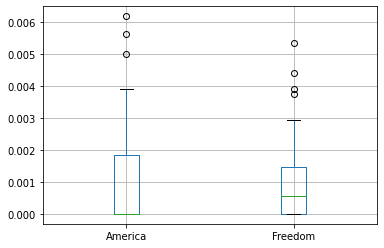

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
Address.boxplot()

# 추론 통계 : 가설 검정
- 영가설(null hypothesis)<br>
1) Ho로 표시, 귀무가설이라고 함<br>
2) 표본1과 표본2의 차이가 없을 것이라는 가설,<br>
    즉 Ho : 표본1 = 표본2<br>
- 대립가설(alternative hypothesis)<br>
1) H1으로 표시, 연구가설이라고도 함<br>
2) 포본1과 표본2의 차이가 있을 것이라는 가설,<br>
    즉 H1 : 표본1 != 표본2<br>
- 유의도 수준<br>
1) p-value<br>
2) 0.05, 0.01, 0.001 학문영역에 따라 다름..<br>
<br>
- 결론
- 학문에서 0.05 의 학문분야에서 0.05와 같거나 크면 영가설을 주장 <br>
- 0.05보다 작으면 대립가설을 주장

## 두 표본 : 평균 / 중앙값 비교
- 평균비교
1. 정규성 검정(정규분포)
2. 등분산 검정
3. two sample t-test(등분산/이분산)
--------------------------------
- 중앙값 비교
1. 정규성 검정(비정규분포)
2. two sample Wilcoxon rank sum test

## 정규성 검정

In [13]:
from scipy import stats
Address.apply(stats.shapiro).T

,0,1
America,0.721343,3.554773e-09
Freedom,0.785276,8.584406e-08


0 : W  ,         1 :  p-value
- p-value < 0.05 : 비정규분포
- p-value >= 0.05 : 정규분포

## two_sample t-test : 평균 비교 ( 정규 분포)
- 비정규분포가 맞지만 일단은 정규분포 실습을 위해 실행

In [14]:
stats.levene(Address.America, Address.Freedom)

LeveneResult(statistic=0.30562499438905616, pvalue=0.5814597818540479)

등분산 검정
- p-value < 0.05 : 이분산
- p-value >= 0.05 : 등분산

여기서는 등분산임을 확인

In [15]:
stats.ttest_ind(Address.America, Address.Freedom) # 등분산

Ttest_indResult(statistic=0.23240740886954162, pvalue=0.8166383124417862)

In [16]:
stats.ttest_ind(Address.America, Address.Freedom, equal_var=False) # 이분산

Ttest_indResult(statistic=0.23240740886954162, pvalue=0.8166556095214181)

- p-value < 0.05 : 대립가설
- p-value >= 0.05 : 영가설

영가설을 주장

## two-sample Wilcoxon rank sum test: 중앙값 비교 (비정규 분포) 

In [17]:
stats.ranksums(Address.America, Address.Freedom)

RanksumsResult(statistic=-0.657077596648461, pvalue=0.5111310233540058)

- p-value < 0.05 : 대립가설
- p-value >= 0.05 : 영가설

영가설 주장
결론 america와 freedom 단어의 중앙값 차이는 없다

## 20세기 이후 : America vs Freedom

- 비정규분포가 된 이유는 freedom과 america의 추세도를 보니, 1900년도 이전에 사용이 잘 안됨

- 이 특성들을 이용하여 1900 <= 1 <= 1950 
- 2차세계대전
- 1950 <= 2
- 단계로 실행 해보는건 어떤가 ? 

## 연습문제 2
- Address_20C 만들기
1. 행 인덱스 >= 1900 추출
2. Period 컬럼 삽입
3. 1950 > 행인덱스 >= 1900 : I
4. 행인덱스 >= 1950 : II

In [20]:
Address.head()

,America,Freedom
1789,0.000000,0.000000
1793,0.000000,0.000000
1797,0.001726,0.000000
1801,0.000000,0.002317
1805,0.000000,0.000923


In [32]:
Address_20C = pd.concat(
    [Address.loc[Address.index >= 1900],
     pd.DataFrame({'Period':
                   ['I' if i < 1950 else 'II'
                  for i in Address.index[Address.index >= 1900]]},
                 index = Address.index[Address.index >= 1900])], axis = 1)

In [33]:
Address_20C.shape

(30, 3)

In [34]:
Address_20C.head()

,America,Freedom,Period
1901,0.000000,0.001808,I
1905,0.000000,0.000000,I
1909,0.000553,0.000184,I
1913,0.000000,0.000000,I
1917,0.001308,0.001308,I


## 20세기 이후 : box plot

I          AxesSubplot(0.1,0.15;0.363636x0.75)
II    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

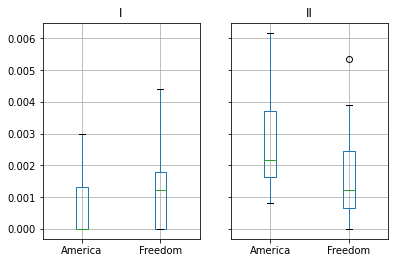

In [35]:
Address_20C.groupby(['Period']).boxplot()

- I
1. America보다 Freedom이 많이 사용됨
2. America가 0인 값도 있음 Freedom도 0이 있지만 America는 50%가 언급되지 않음

- II
1. Freedom이 최솟값이 있긴하지만 많지는 않음.
2. 4개의 박스 플롯을 볼 경우 정규분포일 경우는 약하다.  
3. 정규성에 가까운 모습으로 차츰 보인다..

## 20C 이후 : America

In [36]:
Address_20C[['America','Period']].groupby(['Period']).apply(stats.shapiro)

Period
I     (0.7653388381004333, 0.0027188253588974476)
II       (0.8532366752624512, 0.0120198093354702)
dtype: object

In [37]:
stats.ranksums(Address_20C.America[Address_20C.Period == 'I'],
              Address_20C.America[Address_20C.Period =='II'])

RanksumsResult(statistic=-3.243510750860898, pvalue=0.0011806635490339812)

- 결론 : pvalue 가 0.001이므로 0.05보다 작기 때문에 1950년 이전과 이후의 언급량의 차이가 유의미하게 있다.

## 연습문제 3
- Address_20C의 컬럼 Freedom과 Period의 적절한 평균 / 중앙값 비교 제시

In [38]:
Address_20C[['Freedom','Period']].groupby(['Period']).apply(stats.shapiro)

Period
I     (0.8378307223320007, 0.01988895982503891)
II     (0.910194456577301, 0.10079719871282578)
dtype: object

- 학문분야에 따라 하나만 정규분포인 경우에 관례적으로 적용하는 학문 분야도 존재하디.
- 두가지 다 해보자..

In [40]:
stats.levene(Address_20C.Freedom[Address_20C.Period=='I'],
            Address_20C.Freedom[Address_20C.Period=='II'])

LeveneResult(statistic=0.009866220468386437, pvalue=0.9215849183424364)

- p-value가 0.92이기에 등분산 two_sample t-test 적용

## 등분산 two_sample t-test

In [43]:
stats.ttest_ind(Address_20C.Freedom[Address_20C.Period=='I'],
               Address_20C.Freedom[Address_20C.Period=='II'],
               equal_var=True) 

Ttest_indResult(statistic=-0.768625317648794, pvalue=0.44855067730153275)

- Freedom은 period I 과 II의 평균차이가 없다. 즉 같다.

## two-sample Wilcoxon rank sum test

In [44]:
stats.ranksums(Address_20C.Freedom[Address_20C.Period=='I'],
              Address_20C.Freedom[Address_20C.Period=='II'])

RanksumsResult(statistic=-0.9625902873522665, pvalue=0.33575317363085)

- Freedom은 period I 과 II의 평균차이가 없다. 즉 같다.